In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# dataset api

!kaggle competitions download -c cifar-10

In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
#Extacting the compresses Dtaset
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extacted')

dataset is extacted


In [6]:
!pip install py7zr # installed py7zr to extact .7z files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 26.7 MB/s eta 0:00:00


In [7]:
import py7zr
with py7zr.SevenZipFile('/content/train.7z', mode='r') as z:
    z.extractall()


In [8]:
!ls # list all the files

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the **Dependencies**

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [10]:
filenames = os.listdir('/content/train')

In [11]:
print(len(filenames))

50000


In [12]:
type(filenames)

list

In [13]:
print(filenames[:5])
print(filenames[-5:]) # from this we understood that images are not ordered

['28112.png', '21310.png', '41433.png', '40019.png', '39994.png']
['37461.png', '489.png', '45227.png', '21802.png', '27794.png']


# label processing

In [14]:
labels_df = pd.read_csv('/content/trainLabels.csv') # converting to pandas dataframe

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id']== 12504]

,id,label
12503,12504,ship


In [18]:
labels_df.head(10) # labels are ordered

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [21]:
#Assiging number for each class with one_hot_encoding
one_hot_labels = pd.get_dummies(labels_df['label'])

# converting to numpy array
one_hot_array = one_hot_labels.values

In [22]:
one_hot_array[0:5]

array([[False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False, False, False, False,
         True],
       [False, False, False, False,  True, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False]])

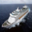

In [23]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/12504.png')
cv2_imshow(img)


In [24]:
id_list = list(labels_df['id']) # making it for (for loop)

In [25]:
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


# Image Processing

In [26]:
# Converting images to numpy arrays
train_folder = '/content/train/'
data =[]
for id in id_list:
  image = Image.open(train_folder + str(id)+'.png') # Image is from PILLOW Which is basically reading the file through path
  image = np.array(image)
  data.append(image)


In [27]:
type(data)

list

In [28]:
len(data)

50000

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
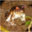

In [31]:
data[0]

In [32]:
x = np.array(data) # converting list to numpy array
y= one_hot_array

In [33]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000, 10)


In [48]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1) # random_state maintain the way of split whenever is runned

In [36]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


40,000- train_data

10,000 - test_data

In [37]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [38]:
x_train_scaled

array([[[[0.07058824, 0.07058824, 0.06666667],
         [0.08627451, 0.09019608, 0.0745098 ],
         [0.14509804, 0.14901961, 0.12941176],
         ...,
         [0.75686275, 0.84313725, 0.89411765],
         [0.74117647, 0.82352941, 0.8745098 ],
         [0.74901961, 0.83529412, 0.88627451]],

        [[0.09019608, 0.09803922, 0.08235294],
         [0.10196078, 0.10588235, 0.08235294],
         [0.1254902 , 0.12156863, 0.09019608],
         ...,
         [0.47058824, 0.56470588, 0.50196078],
         [0.41568627, 0.50980392, 0.44705882],
         [0.47843137, 0.57254902, 0.50980392]],

        [[0.09411765, 0.11764706, 0.08627451],
         [0.09019608, 0.09019608, 0.05882353],
         [0.16470588, 0.14901961, 0.11372549],
         ...,
         [0.33333333, 0.41568627, 0.25490196],
         [0.33333333, 0.41568627, 0.25490196],
         [0.3372549 , 0.41960784, 0.25882353]],

        ...,

        [[0.70196078, 0.58431373, 0.46666667],
         [0.69019608, 0.56862745, 0.45490196]

array([[[ 18,  18,  17],
        [ 22,  23,  19],
        [ 37,  38,  33],
        ...,
        [193, 215, 228],
        [189, 210, 223],
        [191, 213, 226]],

       [[ 23,  25,  21],
        [ 26,  27,  21],
        [ 32,  31,  23],
        ...,
        [120, 144, 128],
        [106, 130, 114],
        [122, 146, 130]],

       [[ 24,  30,  22],
        [ 23,  23,  15],
        [ 42,  38,  29],
        ...,
        [ 85, 106,  65],
        [ 85, 106,  65],
        [ 86, 107,  66]],

       ...,

       [[179, 149, 119],
        [176, 145, 116],
        [179, 149, 119],
        ...,
        [172, 150, 121],
        [186, 161, 130],
        [192, 164, 131]],

       [[178, 150, 120],
        [172, 145, 115],
        [176, 149, 119],
        ...,
        [197, 168, 134],
        [194, 164, 131],
        [192, 163, 128]],

       [[174, 147, 116],
        [174, 147, 116],
        [177, 150, 119],
        ...,
        [195, 163, 133],
        [192, 162, 132],
        [192, 162, 132]]], dtype=uint8)
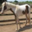

In [39]:
x_train[0]

# Building the Neural Network

In [47]:
import tensorflow as tf
from tensorflow import keras # keras is wrapper of tensorflow,it make implemention easy
from keras.layers import Dense,Flatten

In [41]:
# setting the layers of nn
no_of_classes =10
model = keras.Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(64,activation='relu'))
model.add(Dense(no_of_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
# compile nn
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [43]:
# Training the neural network(nn) # 1 epochs means 1 forward propagation and 1 backward propagation
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2464 - loss: 2.0632 - val_accuracy: 0.3198 - val_loss: 1.8644
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3233 - loss: 1.8679 - val_accuracy: 0.3255 - val_loss: 1.8344
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3430 - loss: 1.8185 - val_accuracy: 0.3528 - val_loss: 1.7863
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3560 - loss: 1.7963 - val_accuracy: 0.3520 - val_loss: 1.7859
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3583 - loss: 1.7792 - val_accuracy: 0.3490 - val_loss: 1.7894
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3658 - loss: 1.7654 - val_accuracy: 0.3475 - val_loss: 1.7896
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3695 - loss: 1.7582 - val_accuracy: 0.3812 - val_loss: 1.7598
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3722 - loss: 1.7455 - 

The accuray is low so,we use pretrained models like ResNet 50.


In [46]:
# ResNet 50
# importing dependicies
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [51]:
# cnn -- has convolutional layers and pooling layers
convolutional_base = ResNet50(weights ='imagenet',include_top=False,input_shape=(256,256,3))
# imagenet is dataset containing 40 million images on which model is trained and weights are found and Stored in weights variable
# include_top = False --> it drop the output layer (containg many neuron) but we want only 10 neuron in output layer as no_of_classes =  10
# pre-trained cnn model(ResNet50) is pre-trained on 256X256 coloured images
convolutional_base.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [52]:
no_of_classes = 10
model = Sequential()
model.add(layers.UpSampling2D((2,2))) # it samples 32X32 image to 64X64 image
model.add(layers.UpSampling2D((2,2))) # it samples 64x64 image to 128X128 image
model.add(layers.UpSampling2D((2,2))) # it samples 128x128 image to 256x256 image -- which is required for ResNet50
model.add(convolutional_base)
model.add(layers.Flatten()) # converts 32x32 to 1x1024(1 dimensional conversion)
model.add(layers.BatchNormalization()) # normalizing after each layer to make processing much faster
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout will make some neuron turn off to reduce the risk of overfitting Becoz nn trends to overfit generally
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5)) # Dropout will make some neuron turn off to reduce the risk of overfitting Becoz nn trends to overfit generally
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes,activation='softmax'))



In [56]:
# compiling the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss ='categorical_crossentropy',metrics=['acc'])

In [57]:
# training the model with cifar 10 dataset
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10) # it will take 1 hr approx

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 339ms/step - acc: 0.3113 - loss: 2.1190 - val_acc: 0.7395 - val_loss: 0.9576
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 419s 344ms/step - acc: 0.6596 - loss: 1.1038 - val_acc: 0.8775 - val_loss: 0.4955
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 344ms/step - acc: 0.7941 - loss: 0.7680 - val_acc: 0.9143 - val_loss: 0.3444
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 378s 336ms/step - acc: 0.8609 - loss: 0.5823 - val_acc: 0.9212 - val_loss: 0.3122
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 391s 343ms/step - acc: 0.9063 - loss: 0.4409 - val_acc: 0.9295 - val_loss: 0.2612
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 336ms/step - acc: 0.9344 - loss: 0.3522 - val_acc: 0.9325 - val_loss: 0.2512
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 386s 343ms/step - acc: 0.9506 - loss: 0.2854 - val_acc: 0.9315 - val_loss: 0.2557
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 437s 339ms/step - acc: 0.9628 - loss: 0.2296 - val_acc: 0.9375 - val_loss: 0.2335
Epoch 9/

# run these cells and get plots

In [ ]:

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

In [ ]:

plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()